# Функции потерь

## Задача 1
Сгенерируйте $M = 100$ выборок $X_1, \dots, X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1, \dots, X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ тайте для всех из полученых теоретической оценок задачи: $2\overline{X}$, $(n + 1)X_{(1)}$, $X_{(1)} + X_{(n)}$, $\frac{n+1}{n}X_{(n)}$. Посчитайте для полученных оценок $\hat{\theta}$ квадратичную функцию потерь $(\hat{\theta} - \theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

In [33]:
try:
    import numpy as np
    import scipy.stats as sps
    import seaborn as sns
    import matplotlib.pyplot as plt
except ImportError as imp:
    print("{} is here the ImportError".format(imp))

### 1. Построение функций потерь для одной выборки

Выберем сначала некоторое произвольное значение параметра , пусть это будет 10.

In [3]:
theta = 10
unif  = sps.uniform(loc = 0, scale = theta)
sample = unif.rvs(size = 1000)

In [42]:
st_1 = []
st_2 = []
st_3 = []
st_4 = []

n = 1 
res = 0
minim = sample[0]
maxim = sample[0]
for x in sample:
    res += x
    minim = min(x,minim)
    maxim = max(x,maxim)
    st_1.append((2*res/n - theta)**2)
    st_2.append(((n + 1)*minim - theta)**2)
    st_3.append( (minim + maxim - theta)**2)
    st_4.append(((n + 1)/n*maxim - theta)**2)
    n += 1
    
    
    
    

In [6]:
twice = [0]
n = 1
res = 0
for x in sample:
    if twice[0] == 0:
        res += x
        twice[0] = 2*(res/n)
        n+=1
    else:
        res += x
        twice.append(2*(res/n))
        n += 1        
    

In [8]:
stat_1 = list()
n = list()
for i in range(1000):
    stat_1.append((twice[i] - theta)**2)
    n.append(i)

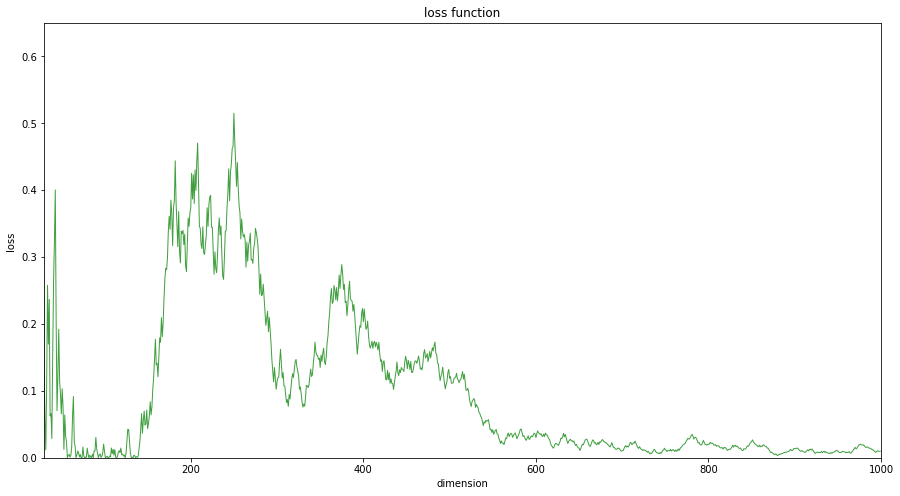

In [34]:
plt.figure(figsize = (15,8))
plt.plot(n,stat_1,'g-',lw =1,alpha=0.75)
plt.xlabel("dimension")
plt.ylabel("loss ")
plt.title("loss function")
plt.xlim(30,1000)
plt.ylim(0,0.65)
plt.show()

In [18]:
second = [0]
n = 1
for x in sample:
    if second[0] == 0:
        minim = x
        second[0] = minim
        n+=1
    else:
        minim = min(x,minim)
        second.append((n + 1)*minim)
        n+=1

In [19]:
stat_2 =list()
n = list()
for i in range(1000):
    stat_2.append((second[i] - theta)**2)
    n.append(i)

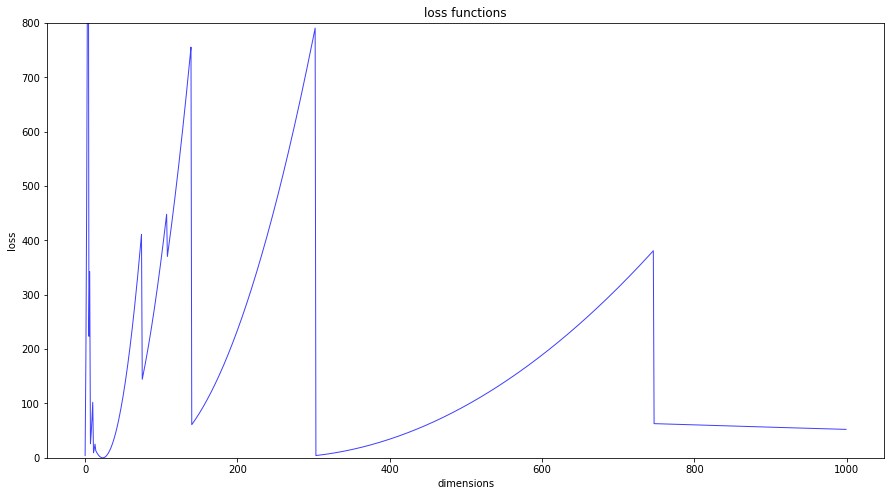

In [36]:
plt.figure(figsize = (15,8))
plt.plot(n,stat_2,'b-',lw=1,alpha=0.75)
plt.xlabel("dimensions")
plt.ylabel("loss")
plt.title("loss functions")
plt.ylim(0,800)
plt.show()

In [22]:
third = [0]
for x in sample:
    if third[0] == 0:
        maxim = x
        minim = x
        third[0] = maxim + minim
        
    else:
        maxim = max(maxim,x)
        minim = min(minim,x)
        third.append(maxim + minim)
        

stats_3 = list()  
n = list()
for i in range(1000):
    stats_3.append((third[i] - theta)**2)
    n.append(i)    

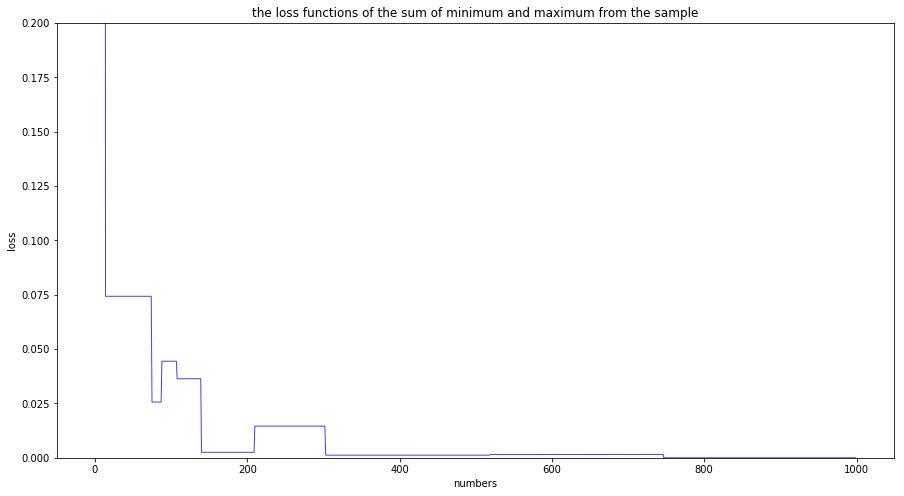

In [26]:
plt.figure(figsize = (15,8))
plt.plot(n,stats_3,'b-',lw=1,alpha=0.75)
plt.xlabel("numbers")
plt.ylabel("loss")
plt.title("the loss functions of the sum of minimum and maximum from the sample")
plt.ylim(0,0.2)
plt.show()

In [27]:
four = [0]
n = 1
for x in sample:
    if four[0] == 0:
        maxim = x
        four[0] = (n + 1)/(n)*maxim
        n+=1
    else:
        maxim = max(x,maxim)
        four.append((n+1)/n*maxim)
        n+=1

In [28]:
stats_4 = list()
n = list()
for i in range(1000):
    stats_4.append((four[i] - theta)**2)
    n.append(i)

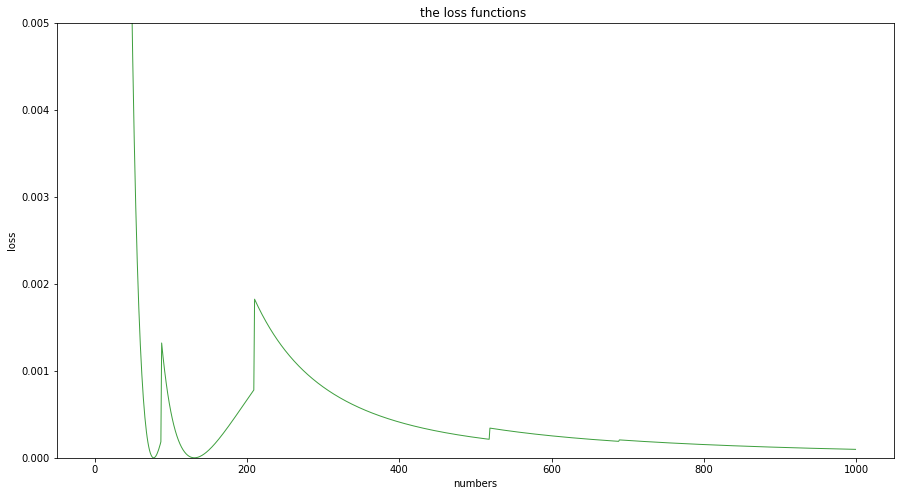

In [32]:
plt.figure(figsize = (15,8))
plt.plot(n,stats_4,'g-',lw=1,alpha=0.75)
plt.xlabel("numbers")
plt.ylabel("loss")
plt.title("the loss functions ")
plt.ylim(0,0.005)
plt.show()

## 2. Проделаем для множеств выборок

In [37]:
%matplotlib inline

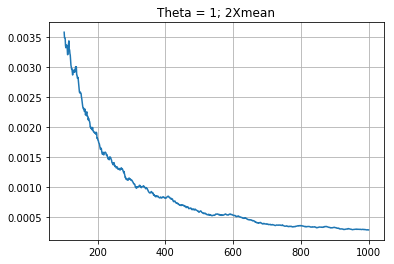

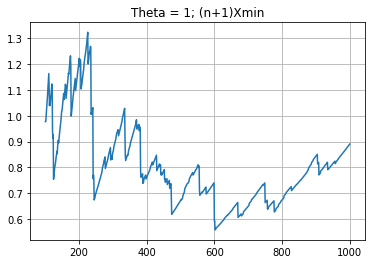

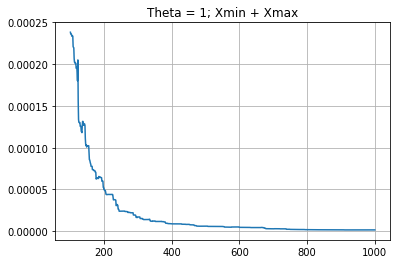

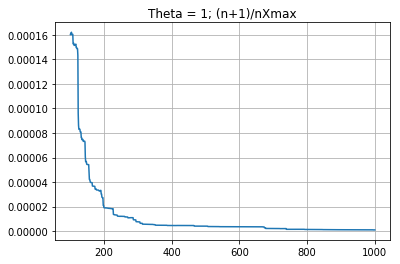

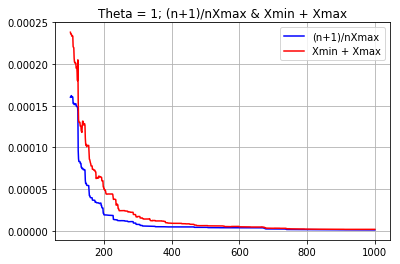

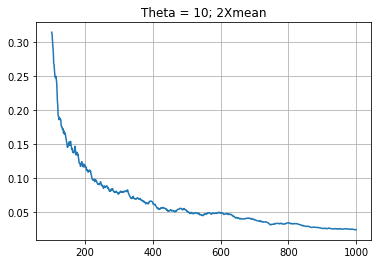

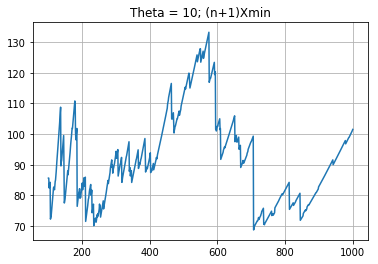

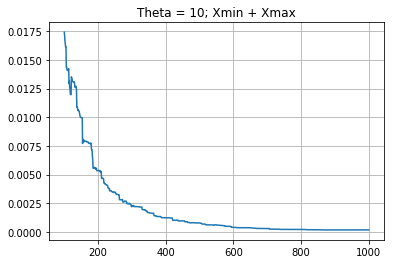

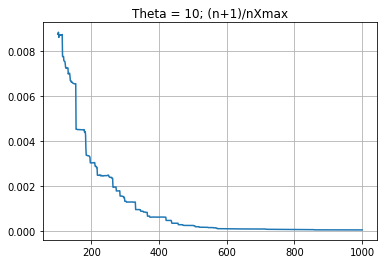

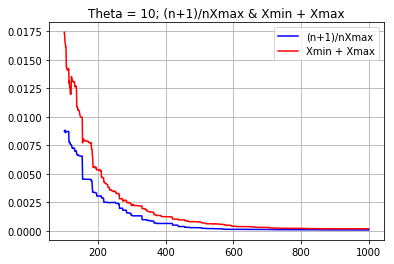

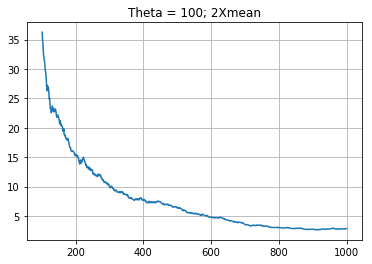

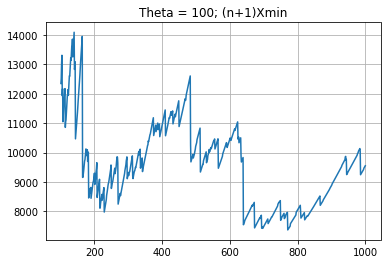

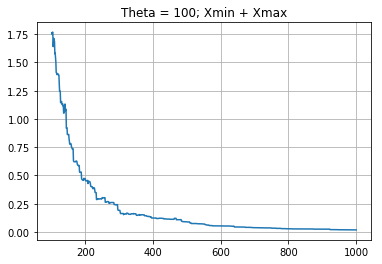

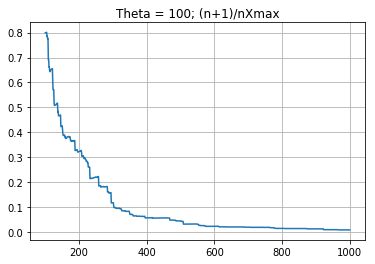

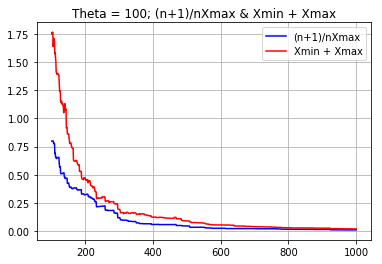

In [41]:
import math

plotcounter = [0]
size_of_sample = 1000
amount_of_samples = 100
start = 100 
theta_list = [1,10,100]

def BuildSample_for_each_theta(theta):
    list_of_samples = [[] for i in range(amount_of_samples)]
    unif = sps.uniform(loc = 0,scale = theta)

    for i in range(amount_of_samples):
        list_of_samples[i] = unif.rvs(size_of_sample)

        st1 = [[] for i in range(amount_of_samples)]
        st2 = [[] for i in range(amount_of_samples)]
        st3 = [[] for i in range(amount_of_samples)]
        st4 = [[] for i in range(amount_of_samples)]
    
    for i in range(amount_of_samples):
        n = 1
        res = 0
        maxim = list_of_samples[i][0]
        minim = list_of_samples[i][0]
        
        for x in list_of_samples[i]:
            res += x
            maxim = max(x,maxim)
            minim = min (x,minim)
            st1[i].append(2*res/n)
            st2[i].append((n + 1)*minim)
            st3[i].append(maxim + minim)
            st4[i].append((n+1)/n * maxim )
            n+=1
            
    avg1 = [0 for i in range(size_of_sample)]
    avg2 = [0 for i in range(size_of_sample)]
    avg3 = [0 for i in range(size_of_sample)]
    avg4 = [0 for i in range(size_of_sample)] 
    
    for j in range(size_of_sample):
        sm1 = 0
        sm2 = 0
        sm3 = 0
        sm4 = 0
        for i in range(amount_of_samples):
            sm1 += (st1[i][j] - theta) ** 2
            sm2 += (st2[i][j] - theta) ** 2
            sm3 += (st3[i][j] - theta) ** 2
            sm4 += (st4[i][j] - theta) ** 2
        avg1[j] = sm1 / amount_of_samples
        avg2[j] = sm2 / amount_of_samples
        avg3[j] = sm3 / amount_of_samples
        avg4[j] = sm4 / amount_of_samples
    
   
        
    idxs = [i + 1 for i in range(size_of_sample)]
    
    fig = plt.figure(plotcounter[0])
    ax = fig.add_subplot(111, title="Theta = " + str(theta) + "; 2Xmean")
    ax.plot(idxs[start:], avg1[start:])
    ax.grid(True)
    plotcounter[0] += 1

    fig = plt.figure(plotcounter[0])
    ax = fig.add_subplot(111, title="Theta = " + str(theta) + "; (n+1)Xmin")
    ax.plot(idxs[start:], avg2[start:])
    ax.grid(True)
    plotcounter[0] += 1

    fig = plt.figure(plotcounter[0])
    ax = fig.add_subplot(111, title="Theta = " + str(theta) + "; Xmin + Xmax")
    ax.plot(idxs[start:], avg3[start:])
    ax.grid(True)
    plotcounter[0] += 1

    fig = plt.figure(plotcounter[0])
    ax = fig.add_subplot(111, title="Theta = " + str(theta) + "; (n+1)/nXmax")
    ax.plot(idxs[start:], avg4[start:])
    ax.grid(True)
    plotcounter[0] += 1
   s
    plotcounter[0] += 1
    
for x in theta_list:
    BuildSample_for_each_theta(x)